In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
stroke_data = pd.read_csv(r"C:\Users\ABC\Downloads\healthcare-dataset-stroke-data.csv")
print(stroke_data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [30]:
# Call the info to see a summary of the data

stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
# Call the head method to print the first several rows
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
# Count the missing values in each column
missing_val = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing_val.columns=['count', '%']
missing_val.sort_values(by='count', ascending=True)

,count,%
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [41]:
# Select d_types
stroke_data.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [44]:
# Concatenate the string columns 'gender' and 'smoking_status'
(stroke_data['gender'] + ',' + stroke_data['smoking_status']).value_counts()

Female,never smoked       1229
Female,Unknown             836
Male,Unknown               708
Male,never smoked          663
Female,formerly smoked     477
Female,smokes              452
Male,formerly smoked       407
Male,smokes                337
Other,formerly smoked        1
Name: count, dtype: int64

In [47]:
# Concatenate the string columns 'hypertension' and 'stroke'
(stroke_data['hypertension'].astype(str) + ',' + stroke_data['stroke'].astype(str)).value_counts()

0,0    4429
1,0     432
0,1     183
1,1      66
Name: count, dtype: int64

In [49]:
# Concatenate the string columns 'heart_disease' and 'stroke'
(stroke_data['heart_disease'].astype(str) + ',' + stroke_data['stroke'].astype(str)).value_counts()

0,0    4632
1,0     229
0,1     202
1,1      47
Name: count, dtype: int64

In [48]:
# Concatenate the string columns 'heart_disease' and 'stroke'
(stroke_data['hypertension'].astype(str) + ',' + stroke_data['heart_disease'].astype(str) + ',' + stroke_data['stroke'].astype(str)).value_counts()

0,0,0    4251
1,0,0     381
0,1,0     178
0,0,1     149
1,0,1      53
1,1,0      51
0,1,1      34
1,1,1      13
Name: count, dtype: int64

In [72]:
# Concatenate the string columns 'age' and 'stroke'
(stroke_data['age'].astype(str) + ',' + stroke_data['stroke'].astype(str)).value_counts()

52.0,0    88
57.0,0    84
53.0,0    83
51.0,0    82
45.0,0    82
          ..
32.0,1     1
42.0,1     1
1.32,1     1
46.0,1     1
14.0,1     1
Name: count, Length: 148, dtype: int64

In [67]:
missing_val['%'].value_counts()

%
0.000000    11
3.933464     1
Name: count, dtype: int64

In [66]:
stroke_data.shape

(5110, 12)

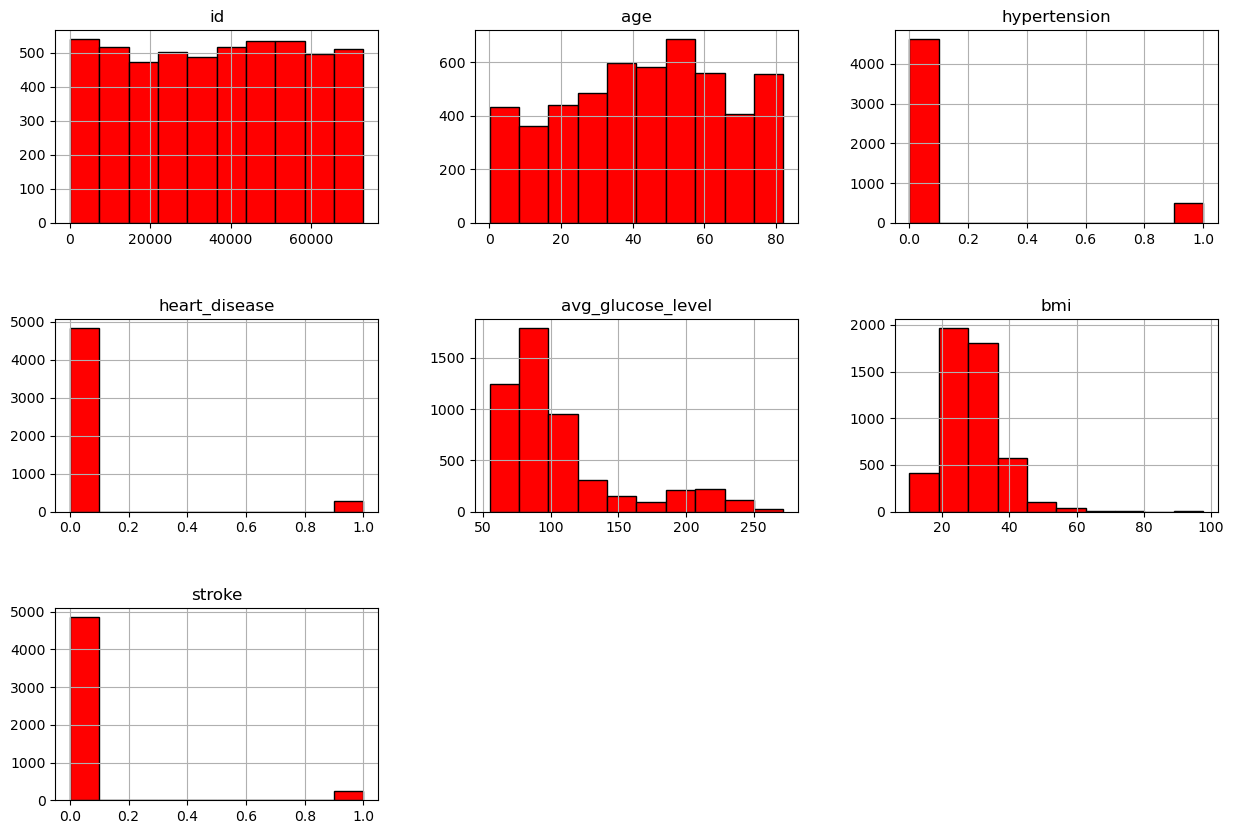

In [53]:
stroke_data.hist(figsize=(15,10), color='red', edgecolor='black')
plt.subplots_adjust(hspace=0.5);